In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
MD_EDA = pd.read_csv('/content/Data.csv')

In [3]:
MD_EDA

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
MD_EDA['ScheduledDay'] = pd.to_datetime(MD_EDA['ScheduledDay']).dt.date.astype('datetime64[ns]')
MD_EDA['AppointmentDay'] = pd.to_datetime(MD_EDA['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [5]:
MD_EDA['sch_weekday'] = MD_EDA['ScheduledDay'].dt.dayofweek

In [6]:
MD_EDA['app_weekday'] = MD_EDA['AppointmentDay'].dt.dayofweek

In [7]:
MD_EDA['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [8]:
MD_EDA['app_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

In [9]:
MD_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [10]:
MD_EDA.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,sch_weekday,app_weekday
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


In [11]:
MD_EDA['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [12]:
MD_EDA['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [13]:
MD_EDA['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [14]:
MD_EDA['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [15]:
MD_EDA['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

<Axes: >

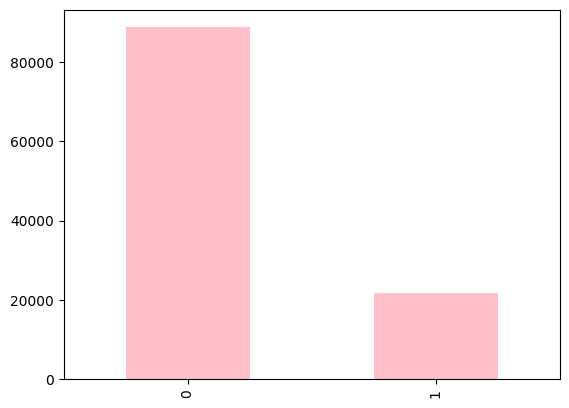

In [ ]:
MD_EDA['Hipertension'].value_counts().plot(kind = 'bar',color='pink')

<Axes: ylabel='Scholarship'>

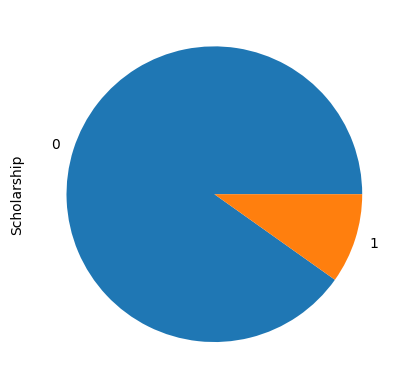

In [ ]:
MD_EDA['Scholarship'].value_counts().plot(kind="pie")

In [16]:
100*MD_EDA['SMS_received'].value_counts()/len(MD_EDA['SMS_received'])

0    67.897437
1    32.102563
Name: SMS_received, dtype: float64

In [17]:
100*MD_EDA['No-show'].value_counts()/len(MD_EDA['No-show'])

No     79.806744
Yes    20.193256
Name: No-show, dtype: float64

In [18]:
# dropping some columns which have no significance
MD_EDA.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

Text(0.5, 1.0, 'Percentage of Missing values')

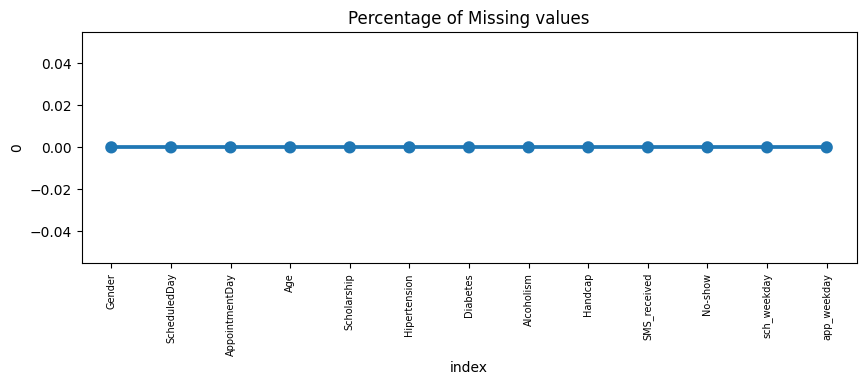

In [ ]:
missing = pd.DataFrame((MD_EDA.isnull().sum()) * 100 / MD_EDA.shape[0]).reset_index()
plt.figure(figsize=(10, 3))
ax = sns.pointplot(x='index', y=0, data=missing)  # Specify x and y explicitly
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")

In [ ]:
print(MD_EDA['Age'].max())
print(MD_EDA['Age'].min())

115
-1


In [19]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

MD_EDA['Age_group'] = pd.cut(MD_EDA.Age, range(1, 130, 20), right=False, labels=labels)

In [20]:
MD_EDA.to_csv('MD_EDA-modified.csv')

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Age ----------
 0      3539
 1      

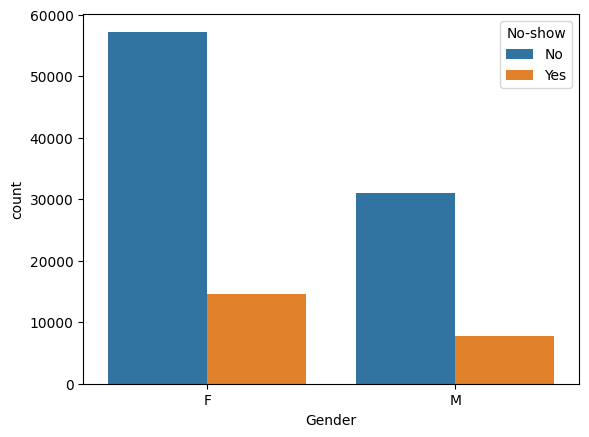

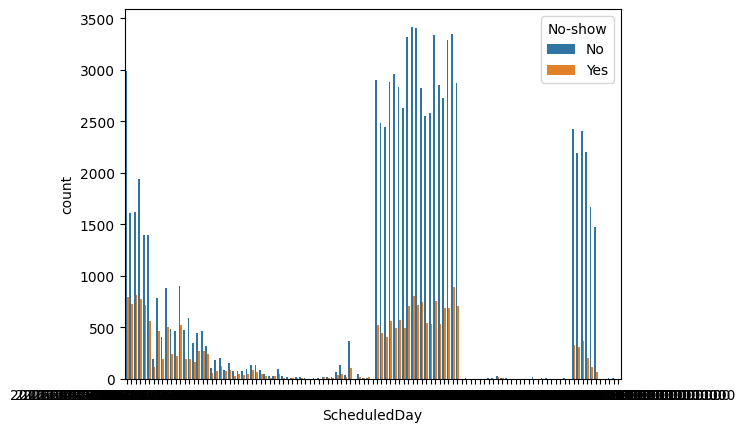

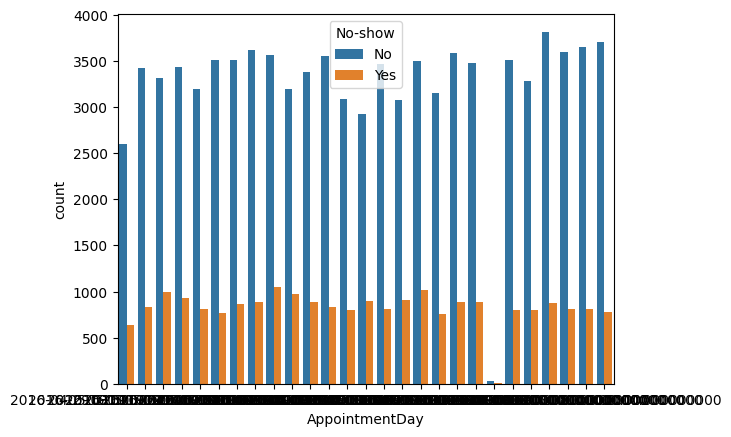

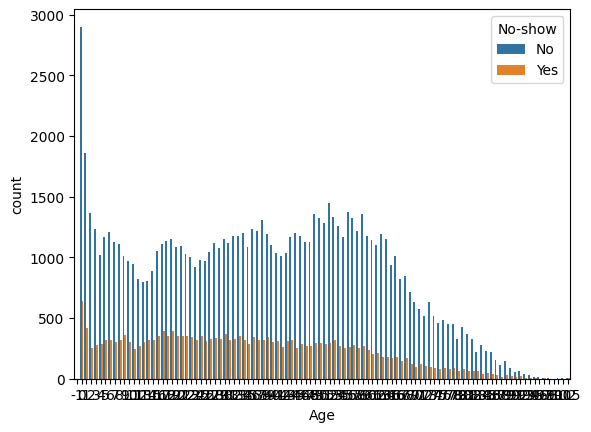

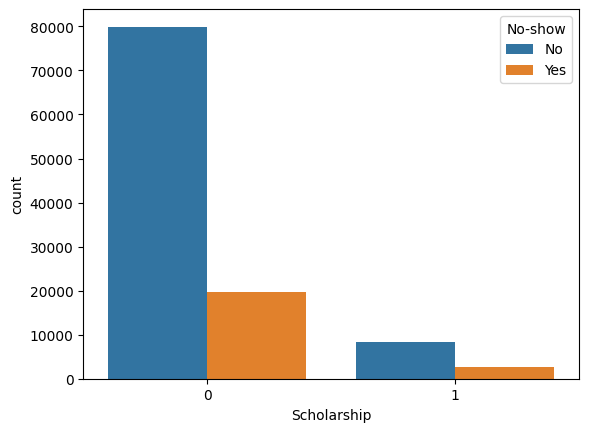

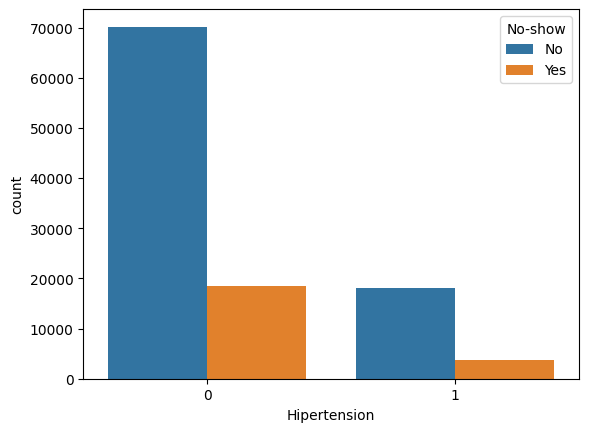

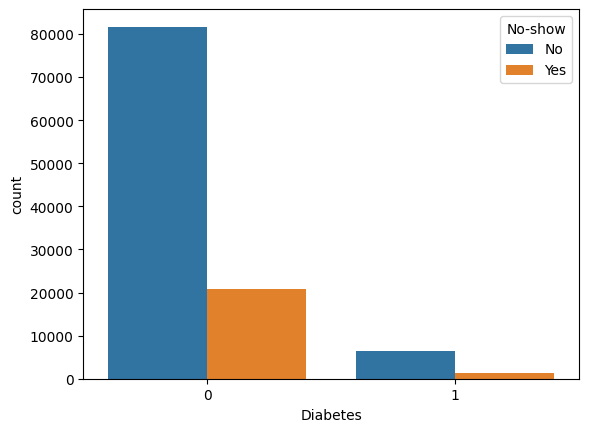

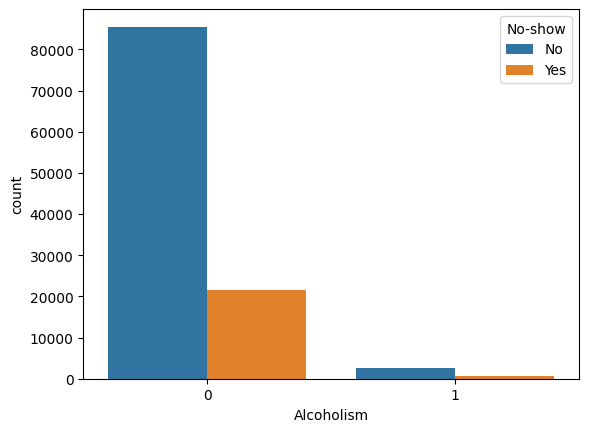

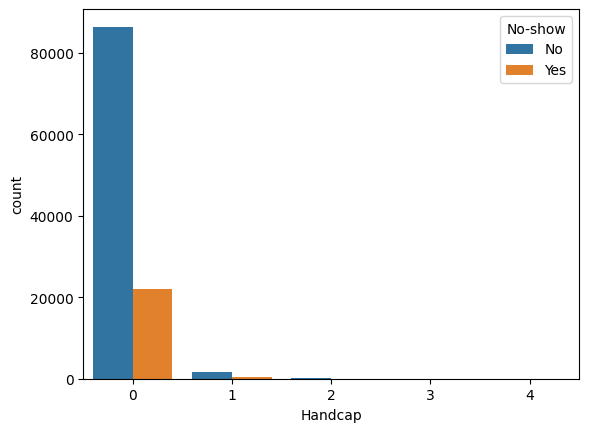

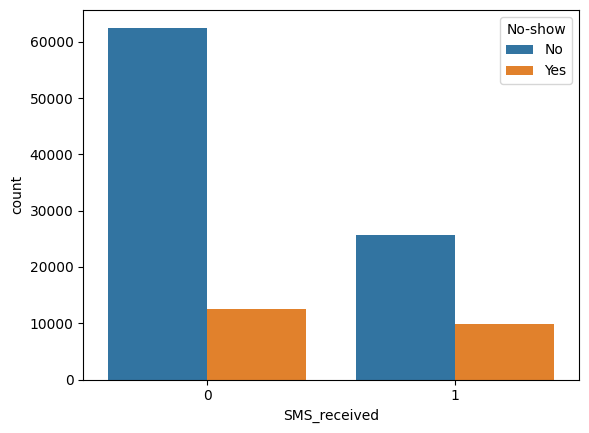

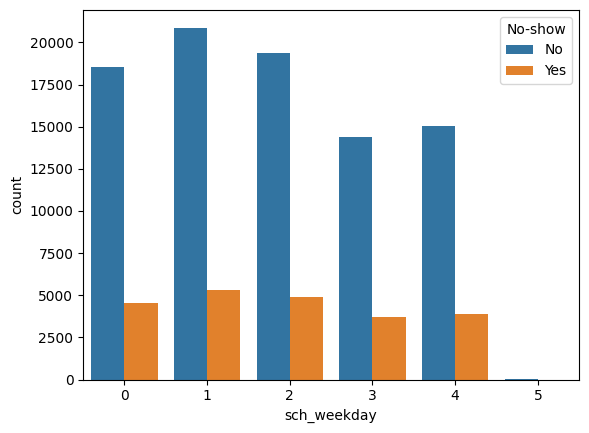

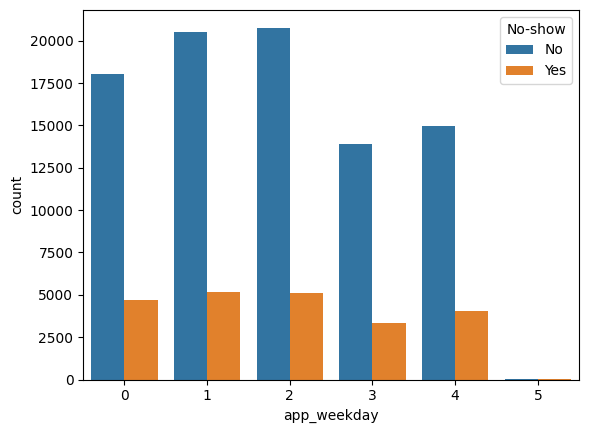

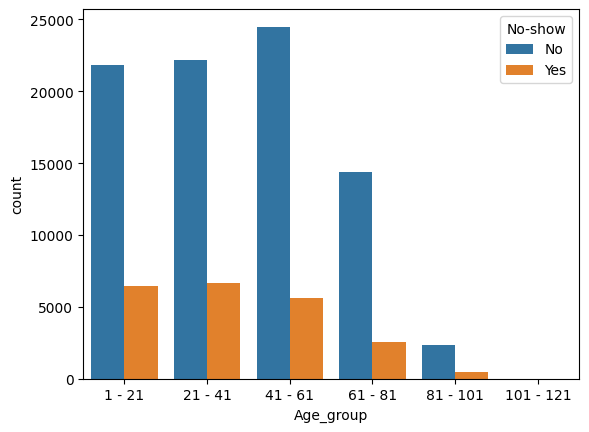

In [ ]:
for i, predictor in enumerate(MD_EDA.drop(columns=['No-show'])):
    print('-'*10,predictor,'-'*10)
    print(MD_EDA[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=MD_EDA, x=predictor, hue='No-show')

In [ ]:
MD_EDA['No-show'] = np.where(MD_EDA['No-show'] == 'Yes',1,0)

In [ ]:
MD_EDA['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [ ]:
MD_EDA_dummies = pd.get_dummies(MD_EDA)
MD_EDA_dummies.head()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,62,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,56,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,62,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,8,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,56,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


<ipython-input-28-1dd5591d7cc1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  MD_EDA_dummies.corr()['No-show'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

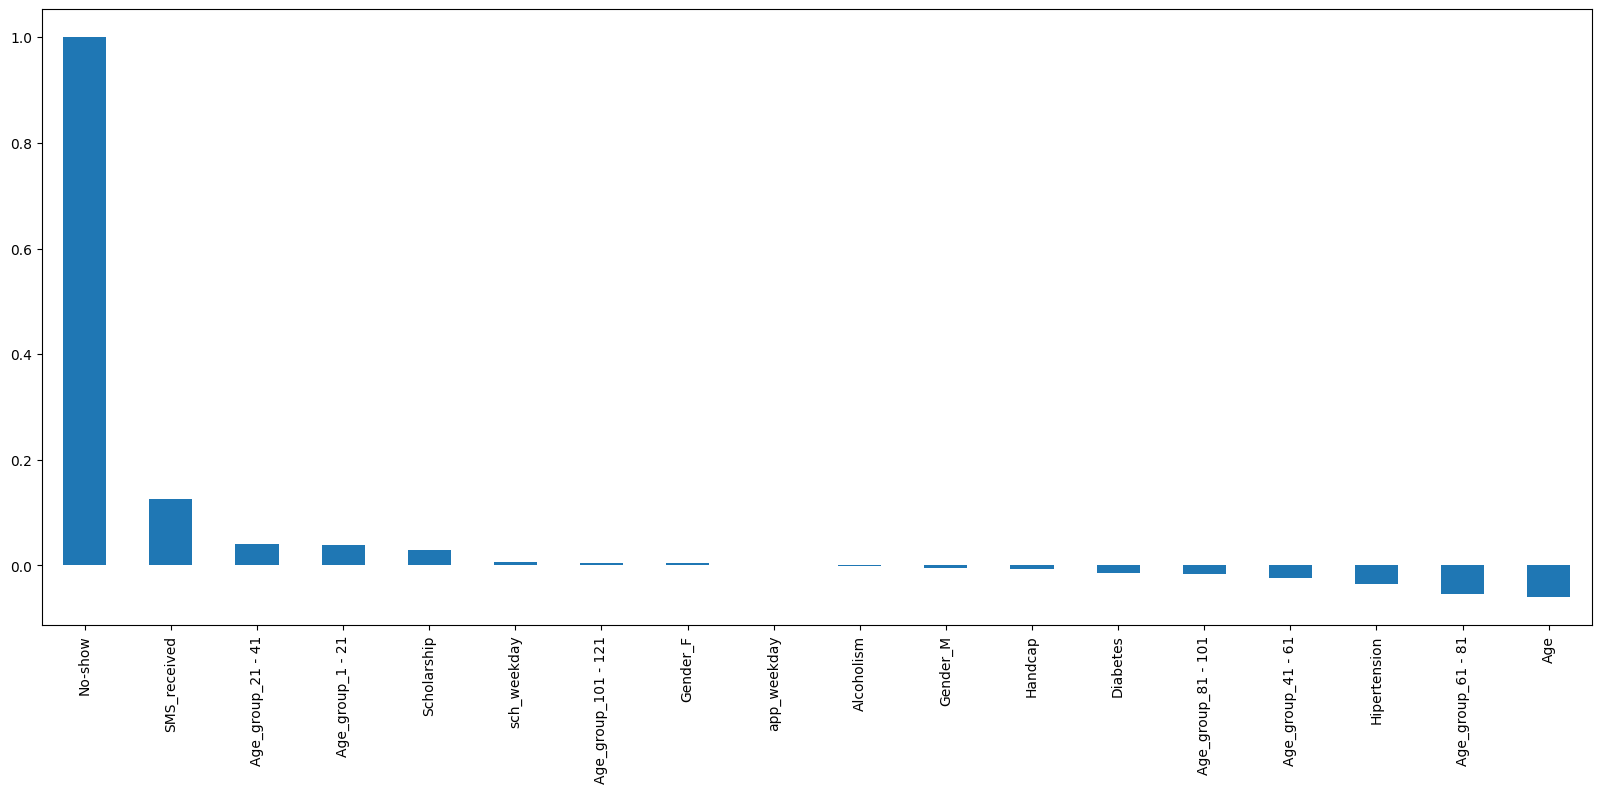

In [ ]:
plt.figure(figsize=(20,8))
MD_EDA_dummies.corr()['No-show'].sort_values(ascending = False).plot(kind='bar')

<Axes: xlabel='app_weekday', ylabel='No-show'>

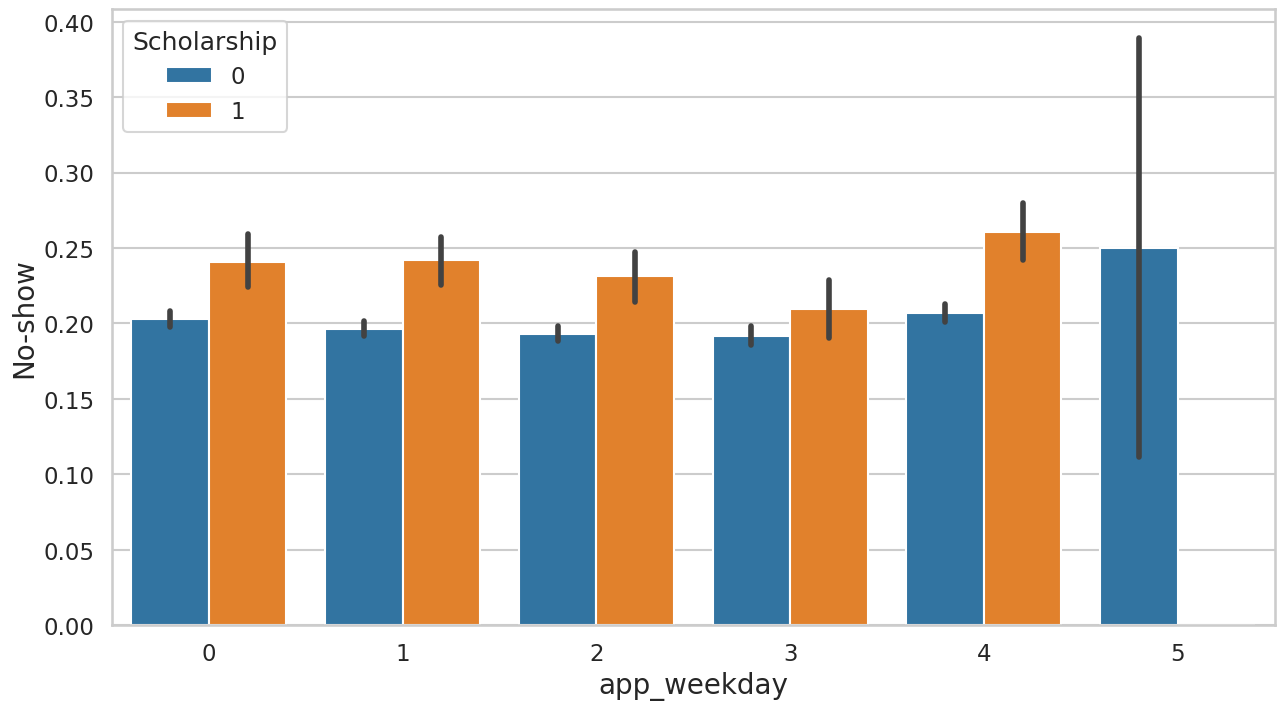

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=MD_EDA,x='app_weekday',y='No-show',hue='Scholarship')

<ipython-input-29-d59f414db809>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(MD_EDA_dummies.corr(), cmap="Paired")


<Axes: >

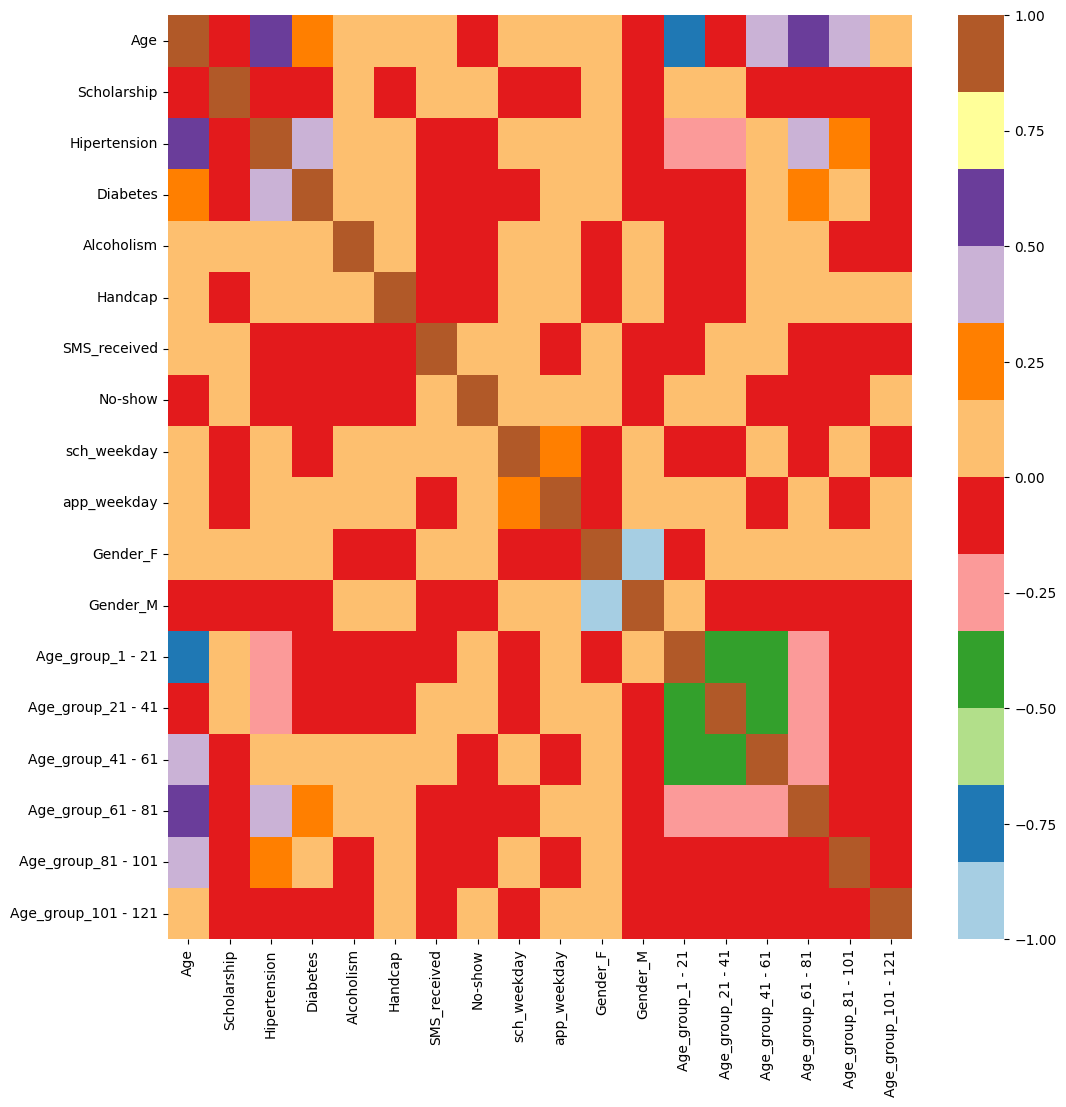

In [ ]:

plt.figure(figsize=(12,12))
sns.heatmap(MD_EDA_dummies.corr(), cmap="Paired")

In [ ]:
new_df1_target0=MD_EDA.loc[MD_EDA['No-show']==0]
new_df1_target1=MD_EDA.loc[MD_EDA['No-show']==1]

In [ ]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

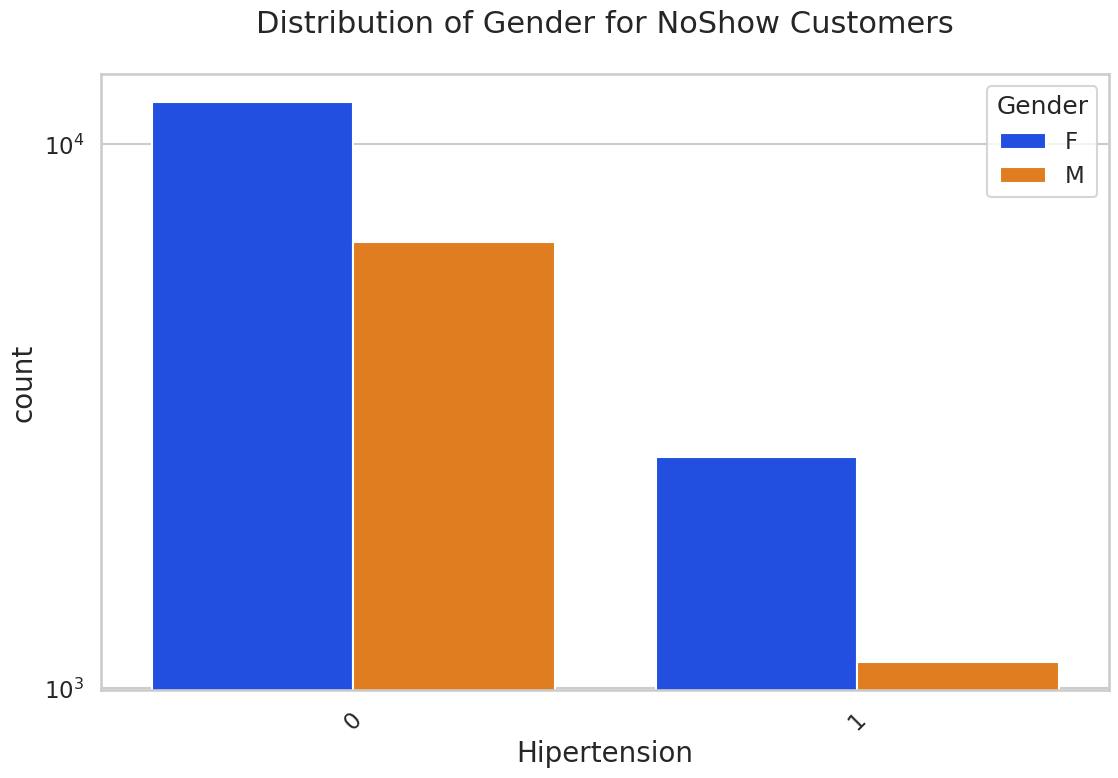

In [ ]:
uniplot(new_df1_target1,col='Hipertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

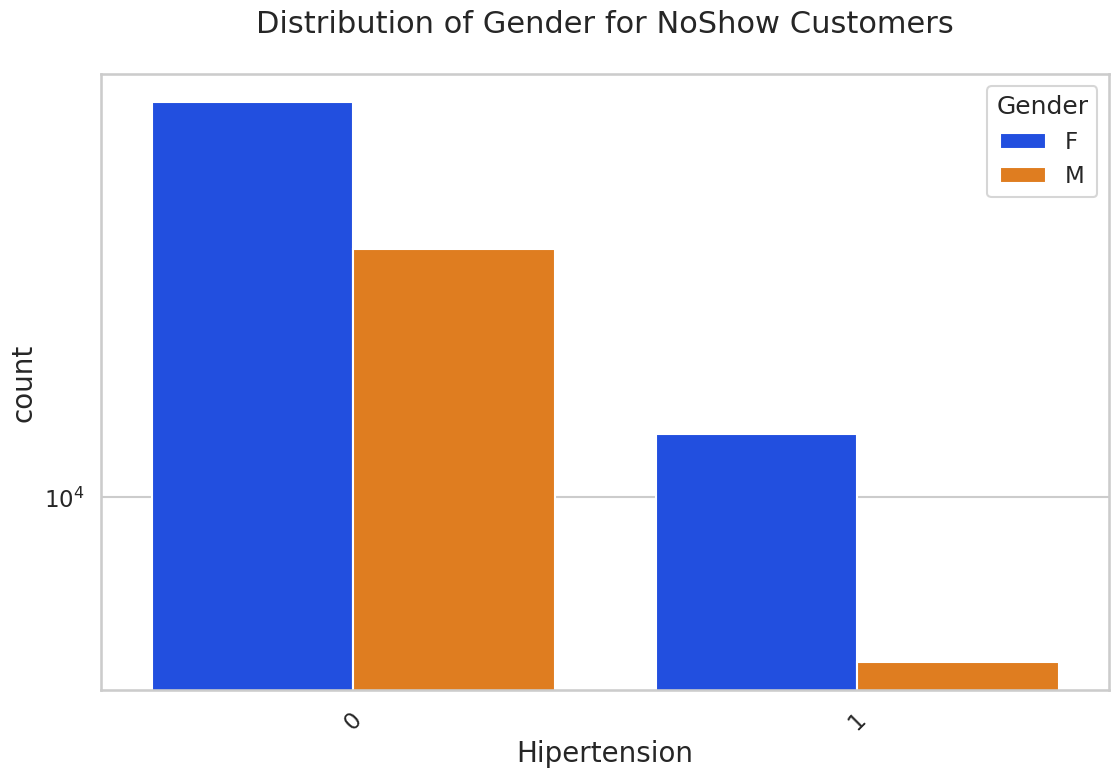

In [ ]:
uniplot(new_df1_target0,col='Hipertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

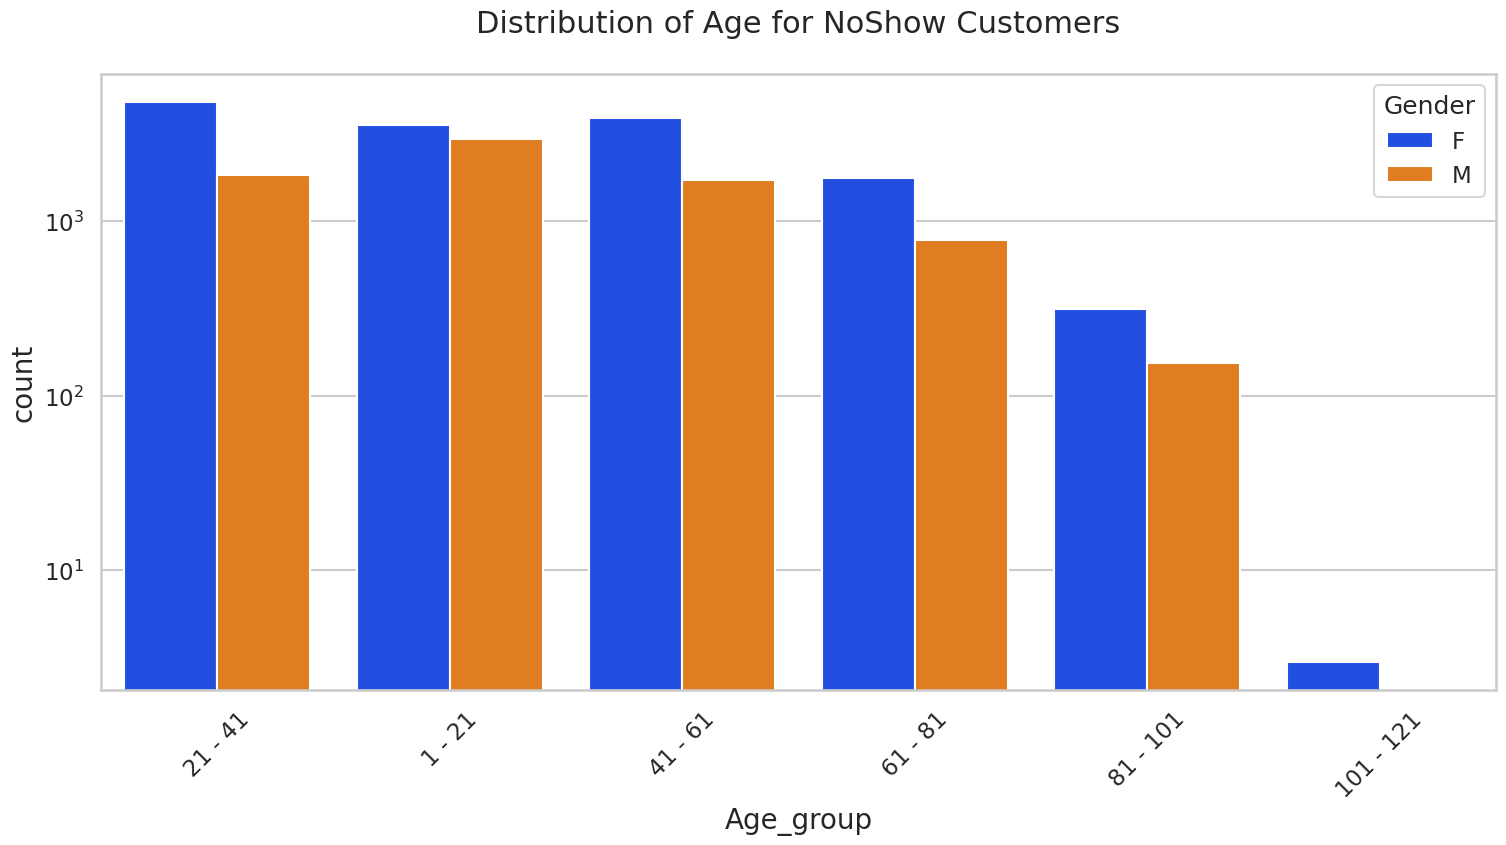

In [ ]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

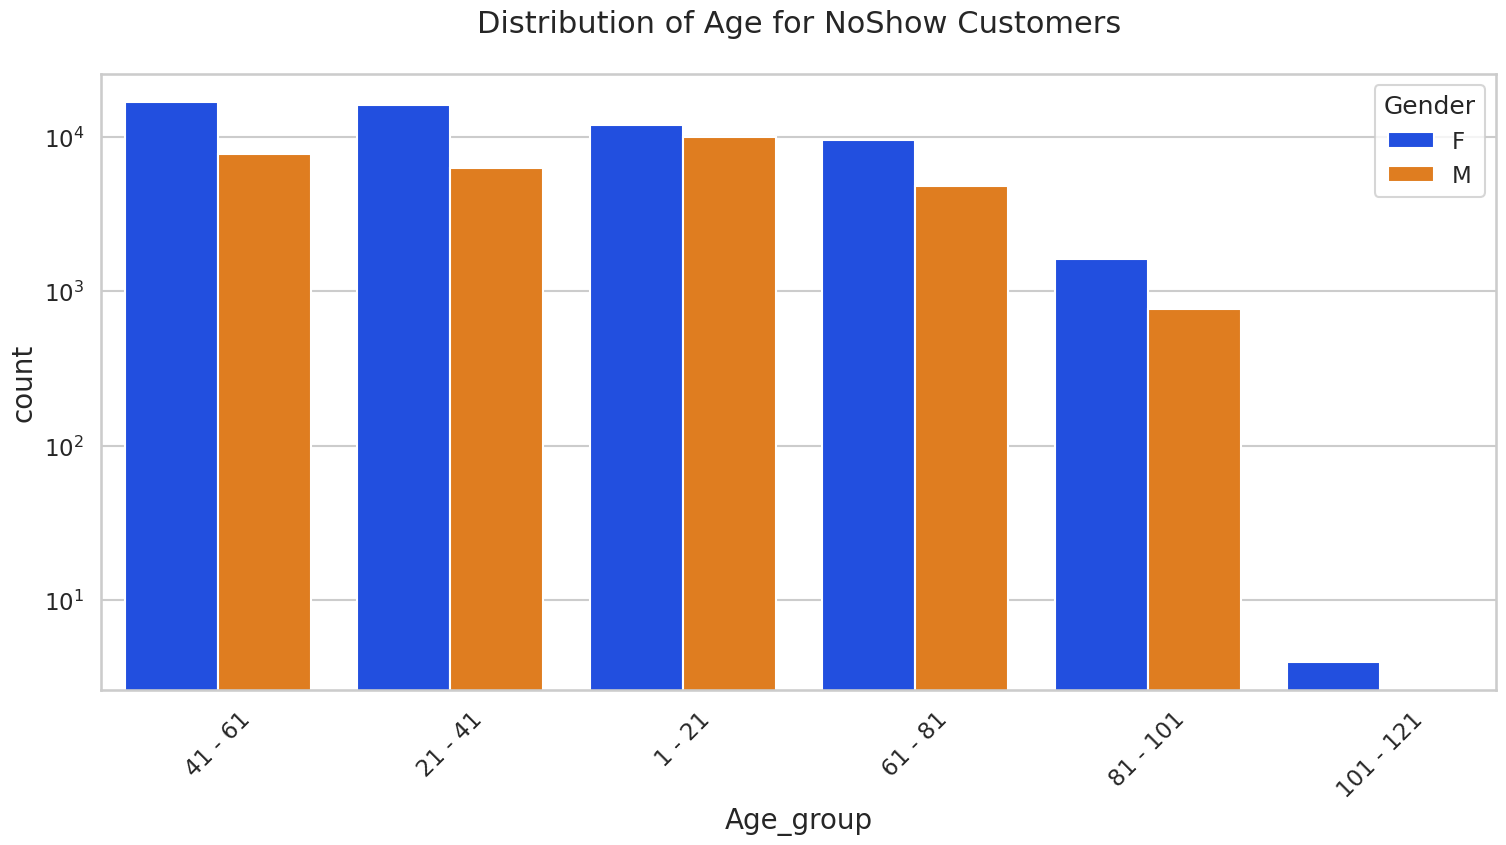

In [ ]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

> **This Dashboard of Medical_Appointments_Data_EDA**

In [1]:
from PIL import Image

image_path = "/content/Screenshot 1445-04-30 at 2.04.12 AM.png"
image = Image.open(image_path)

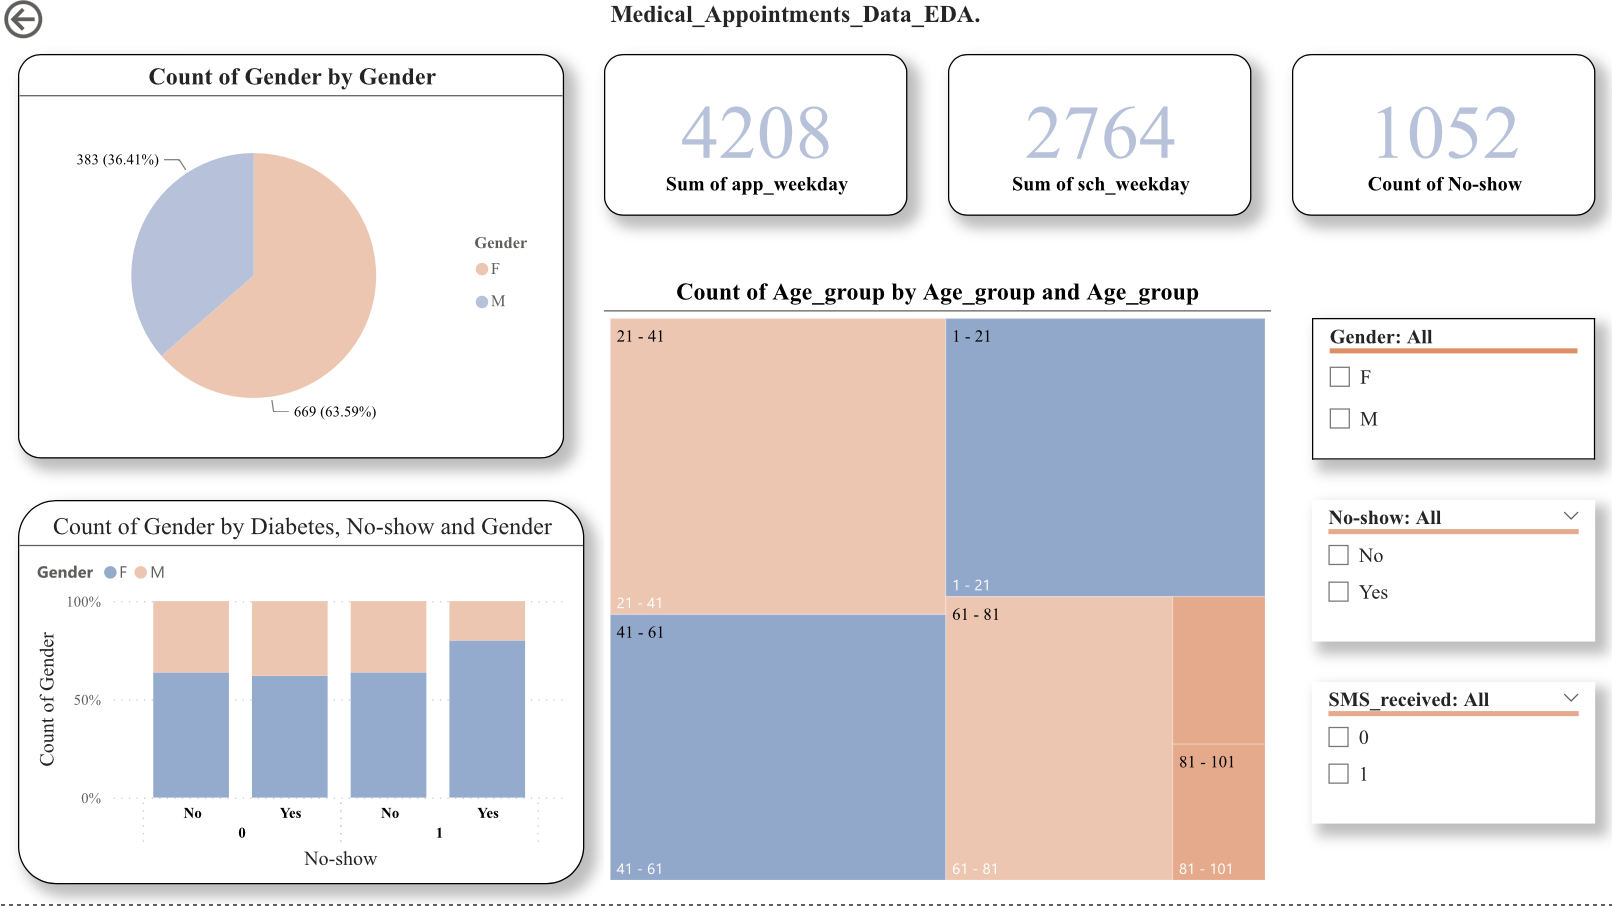

In [2]:
image